### Load the datasets

In [133]:
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime

# Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import itertools

#Scikit-Learn for Modeling
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [134]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [135]:
#The training Set
df_train = pd.read_csv("../data/train.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)

In [136]:
#Additional Information on those stores
df_store = pd.read_csv("../data/store.csv"
                       , low_memory = False)

<h6> get rid of closed stores and prevent the models to train on them and get false guidance</h6>

In [137]:
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [138]:
#making sure the indexes are back to [0,1,2,3 etc.]
df_train = df_train.reset_index(drop=True)

In [139]:
print ("Our new training set has now {} rows ".format(df_train.shape[0]))

Our new training set has now 844392 rows 


In [140]:
df_train.Sales.describe()
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [141]:
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True)

{'Mean': 6955.959133664481, 'Median': 6369.0}

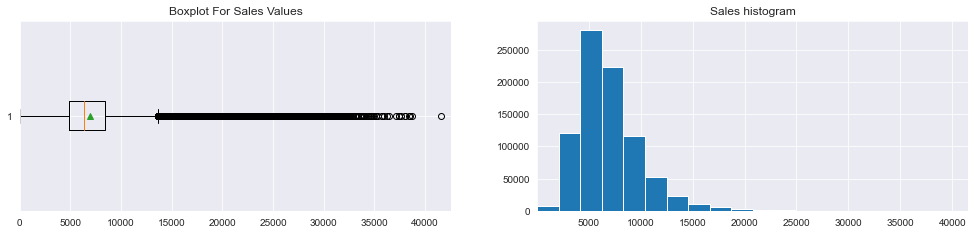

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}

In [143]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


In [144]:
df_train.Customers.describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

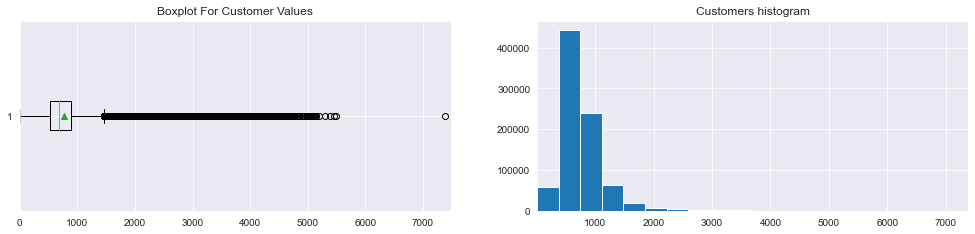

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

In [146]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[df_train.Customers==0].count()[0]/df_train.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [147]:
df_train[df_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2013-01-22,27190,7388,1,1,0,0


In [148]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]

0.8235517202000219

In [149]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [150]:
df_store[pd.isnull(df_store.CompetitionDistance)]
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

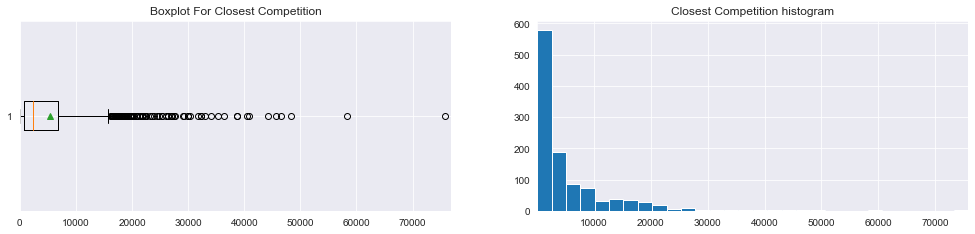

In [151]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(df_store.CompetitionDistance),"Median":np.nanmedian(df_store.CompetitionDistance),"Standard Dev":np.nanstd(df_store.CompetitionDistance)}
#That's what i thought, very different values, let's see why

<h6> It is realistically better to input the median value to the three Nan stores then the mean since the mean is biased by those outliers</h6>

In [152]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

<h6>CompetitionOpenSinceMonth and CompetitionOpenSinceYear</h6>

In [153]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

<h6>Promo2SinceWeek, Promo2SinceYear and PromoInterval</h6>

In [154]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [155]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

<h6>Now that we are done with clearing missing values, let's merge the two datasets.</h6>

In [156]:
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_train_store.head()
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1])))

The Train_Store dataset has 844338 Rows and 18 Variables


In [157]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [158]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

In [159]:
df_train_store['Day']=df_train_store.Date.dt.day
del df_train_store["Date"]

In [160]:
df_train_store['StoreType'].isnull().any(),df_train_store['Assortment'].isnull().any(),df_train_store['StateHoliday'].isnull().any()
#No Null values we can proceed with the transformation

(False, False, False)

In [161]:
df_train_store["StoreType"].value_counts(),df_train_store["Assortment"].value_counts(),df_train_store["StateHoliday"].value_counts()

(a    457042
 d    258768
 c    112968
 b     15560
 Name: StoreType, dtype: int64,
 a    444875
 c    391254
 b      8209
 Name: Assortment, dtype: int64,
 0    843428
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64)

In [162]:
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [163]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes

In [164]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

In [165]:
df_train_store.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                 category
SchoolHoliday                   int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
SalesperCustomer              float64
Month                           int64
Year                            int64
Day                             int64
StateHoliday_cat              float64
Assortment_cat                float64
StoreType_cat                 float64
PromoInterval_cat             float64
dtype: object

In [166]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat'],
      dtype='object')

In [167]:
df_train_store['CompetitionOpenSince'] = np.where((df_train_store['CompetitionOpenSinceMonth']==0) & (df_train_store['CompetitionOpenSinceYear']==0) , 0,(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) + (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)))

In [168]:
#now that CompetitionOpenSince is created
#we can get rid of `CompetitionOpenSinceYear` and `CompetitionOpenSinceMonth`
del df_train_store['CompetitionOpenSinceYear']
del df_train_store['CompetitionOpenSinceMonth']

##### The StateHoliday is not very important to distinguish (what type of holiday) and can be merged in a binary variable called is_holiday_state

In [169]:
df_train_store["is_holiday_state"] = df_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [170]:
del df_train_store['StateHoliday_cat']

In [171]:
df_train_store=pd.get_dummies(df_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

In [172]:
del df_train_store['Assortment_cat']
del df_train_store['StoreType_cat']
del df_train_store['PromoInterval_cat']

In [173]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'SalesperCustomer', 'Month',
       'Year', 'Day', 'CompetitionOpenSince', 'is_holiday_state',
       'is_Assortment_a', 'is_Assortment_b', 'is_Assortment_c',
       'is_StoreType_a', 'is_StoreType_b', 'is_StoreType_c', 'is_StoreType_d',
       'is_PromoInteval_0', 'is_PromoInteval_Feb,May,Aug,Nov',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec'],
      dtype='object')

<h6>The Train set is ready to be fed to the RandomForest Algorithm</h6>

In [174]:
df_train_store.to_csv('../data/clean_train.csv')

<h6>Let's do the same transformation for the test set now.</h6>

In [175]:
df_test = pd.read_csv("../data/test.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)
print ("The Test dataset has {} Rows and {} Variables".format(str(df_test.shape[0]),str(df_test.shape[1])))

The Test dataset has 41088 Rows and 8 Variables


In [176]:
df_test.fillna(1, inplace = True)

df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1])))
df_test_store['Month']=df_test_store.Date.dt.month
df_test_store['Year']=df_test_store.Date.dt.year
df_test_store['Day']=df_test_store.Date.dt.day

df_test_store['StateHoliday'] = df_test_store['StateHoliday'].astype('category')
df_test_store['Assortment'] = df_test_store['Assortment'].astype('category')
df_test_store['StoreType'] = df_test_store['StoreType'].astype('category')
df_test_store['PromoInterval']= df_test_store['PromoInterval'].astype('category')
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday'].cat.codes
df_test_store['Assortment_cat'] = df_test_store['Assortment'].cat.codes
df_test_store['StoreType_cat'] = df_test_store['StoreType'].cat.codes
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval'].cat.codes
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday_cat'].astype('float')
df_test_store['Assortment_cat'] = df_test_store['Assortment_cat'].astype('float')
df_test_store['StoreType_cat'] = df_test_store['StoreType_cat'].astype('float')
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval_cat'].astype('float')
df_test_store['CompetitionOpenSince'] = np.where((df_test_store['CompetitionOpenSinceMonth']==0) & (df_test_store['CompetitionOpenSinceYear']==0) , 0,(df_test_store.Month - df_test_store.CompetitionOpenSinceMonth) + (12 * (df_test_store.Year - df_test_store.CompetitionOpenSinceYear)) )
df_test_store["is_holiday_state"] = df_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
df_test_store=pd.get_dummies(df_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

The Test_Store dataset has 41088 Rows and 17 Variables


In [177]:
del df_test_store["Date"]
del df_test_store['CompetitionOpenSinceYear']
del df_test_store['CompetitionOpenSinceMonth']

del df_test_store['StateHoliday_cat']

del df_test_store['Assortment_cat']
del df_test_store['StoreType_cat']
del df_test_store['PromoInterval_cat']

del df_test_store['StateHoliday']

del df_train_store['StateHoliday']

In [178]:
df_test_store.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'Month', 'Year', 'Day', 'CompetitionOpenSince', 'is_holiday_state',
       'is_Assortment_a', 'is_Assortment_b', 'is_Assortment_c',
       'is_StoreType_a', 'is_StoreType_b', 'is_StoreType_c', 'is_StoreType_d',
       'is_PromoInteval_0', 'is_PromoInteval_Feb,May,Aug,Nov',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [179]:
df_train_store.to_csv('../data/clean_test.csv')